# You've Got a FRED

In [68]:
import pandas as pd
import datetime
from pathlib import Path
%matplotlib inline

## Hodrick-Prescott filter analysis

### GDP Analysis

In [69]:
# Read the GDP csv data from FRED and set the column `DATE` as a datetime index
file_path = Path("../Resources/gdp_data.csv")
gdp = pd.read_csv(file_path, index_col='DATE', infer_datetime_format=True, parse_dates=True)
gdp.head()

,GDP
DATE,
2004-01-01,11920.169
2004-04-01,12108.987
2004-07-01,12303.340
2004-10-01,12522.425
2005-01-01,12761.337


<AxesSubplot:xlabel='DATE'>

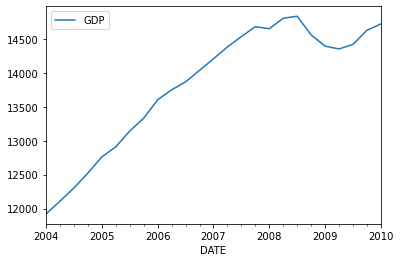

In [70]:
# Plot the raw GDP data as a line plot
gdp.plot()

In [71]:
# Use the `hpfilter` function to decompose the GDP column into the trend and noise components.
# statsmodels.tsa.seasonal.seasonal_decompose
import statsmodels.api as sm
noise, trend = sm.tsa.filters.hpfilter(gdp["GDP"])

<AxesSubplot:xlabel='DATE'>

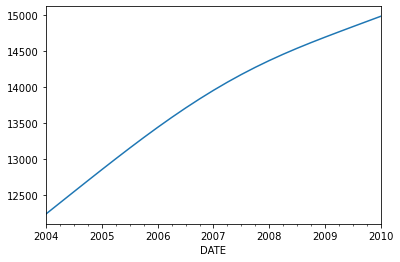

In [72]:
# Plot the GDP trend data as a line plot
trend.plot()

<AxesSubplot:xlabel='DATE'>

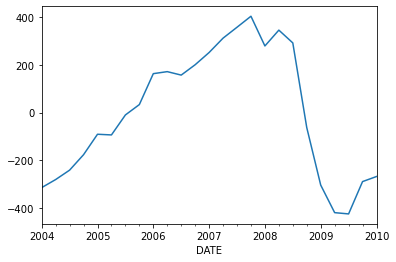

In [73]:
# Plot the GDP noise data as a line plot
noise.plot()

In [74]:
ma = gdp.rolling(window=5).mean()
ema = gdp.ewm(halflife=5).mean()

,gdp,decomposition trend,ma,ema
DATE,,,,
2005-01-01,12761.337,12851.828484,12323.2516,12381.119037
2005-04-01,12910.022,13003.373228,12521.2222,12502.357205
2005-07-01,13142.873,13152.507653,12727.9994,12635.859539
2005-10-01,13332.316,13298.484800,12933.7946,12770.395876
2006-01-01,13603.933,13440.551690,13150.0962,12921.766617


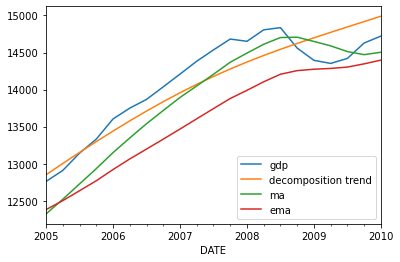

In [75]:
# df = pd.concat([gdp, ma, ema], axis="columns", join="inner").dropna()
# df.columns=["gdp", "ma", "ema"]

df = pd.concat([gdp, trend, ma, ema], axis="columns", join="inner").dropna()
df.columns=["gdp", "decomposition trend", "ma", "ema"]

df.plot()
df.head()

---

### Inflation

In [76]:
# Read the Inflation csv data from FRED and set the column `DATE` as a datetime index
# Note: Inflation, as measured by consumer price index in urban areas
file_path = Path("../Resources/inflation_data.csv")
inflation = pd.read_csv(file_path, index_col='DATE', infer_datetime_format=True, parse_dates=True)
inflation.head()

,CPIAUCNS
DATE,
2004-01-01,185.2
2004-02-01,186.2
2004-03-01,187.4
2004-04-01,188.0
2004-05-01,189.1


<AxesSubplot:xlabel='DATE'>

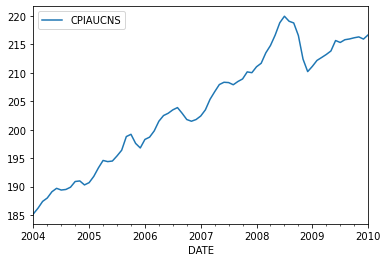

In [77]:
# Plot the raw inflation data as a line plot
inflation.plot()

In [78]:
# Use the `hpfilter` function to decompose the `CPIAUCNS` column into the trend and noise components.
noise, trend = sm.tsa.filters.hpfilter(inflation["CPIAUCNS"])

<AxesSubplot:xlabel='DATE'>

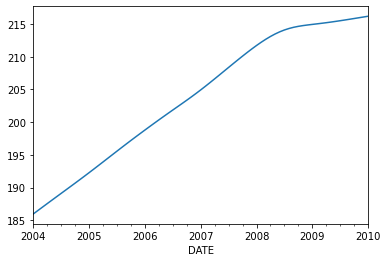

In [79]:
# Plot the inflation trend data as a line plot
trend.plot()

<AxesSubplot:xlabel='DATE'>

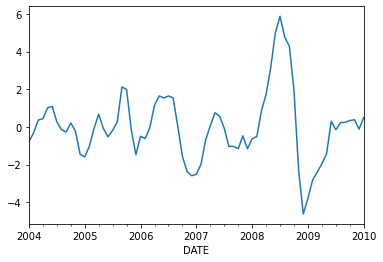

In [80]:
# Plot the inflation noise data as a line plot
noise.plot()

<AxesSubplot:xlabel='DATE'>

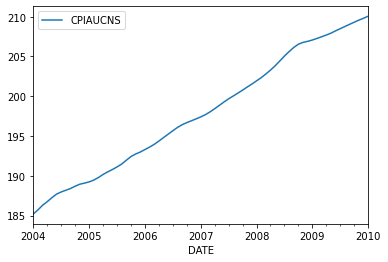

In [81]:
# Plot the exponentially-weighted moving average for the inflation data
ema = inflation.ewm(halflife=20).mean()
ema.plot()

---

### Job Data

In [82]:
# Read the job count csv data from FRED and set the column `DATE` as a datetime index
# Note: This is the total number of non-farm payrolls
file_path = Path("../Resources/job_roll_data.csv")
job_roll = pd.read_csv(file_path, index_col='DATE', infer_datetime_format=True, parse_dates=True)
job_roll.head()

,PAYEMS
DATE,
2004-01-01,130787
2004-02-01,130844
2004-03-01,131156
2004-04-01,131426
2004-05-01,131710


<AxesSubplot:xlabel='DATE'>

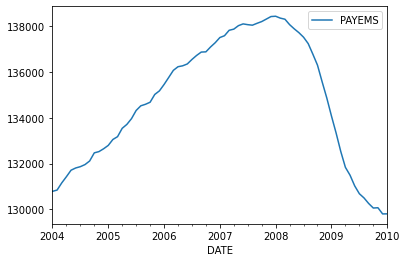

In [83]:
# Plot the raw job data as a line plot
job_roll.plot()

In [84]:
# Use the `hpfilter` function to decompose the `PAYEMS` column into the trend and noise components.
noise, trend = sm.tsa.filters.hpfilter(job_roll["PAYEMS"])

<AxesSubplot:xlabel='DATE'>

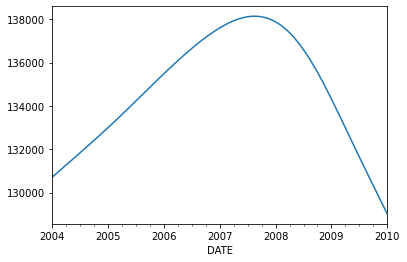

In [85]:
# Plot the job trend data as a line plot
trend.plot()

<AxesSubplot:xlabel='DATE'>

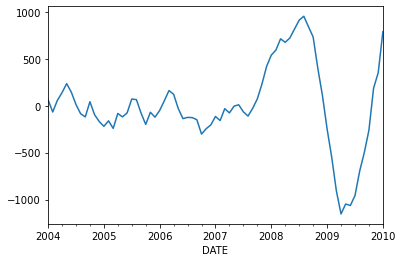

In [86]:
# Plot the job noise data as a line plot
noise.plot()

<AxesSubplot:xlabel='DATE'>

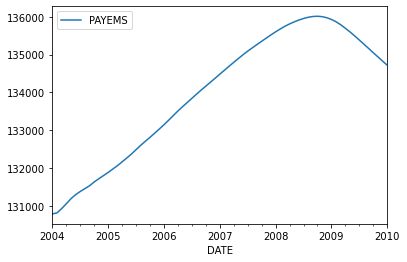

In [87]:
# Plot the exponentially-weighted moving average for the job data
ema = job_roll.ewm(halflife=50).mean()
ema.plot()